In [67]:
import requests
import xmltojson
import pandas as pd
import io
import csv
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
import json 


In [68]:
url = 'https://www.consejologopedas.com/censo_de_colegiados/pag_1/descargar.html'

In [69]:
url_test = 'https://www.consejologopedas.com/censo_de_colegiados/pag_1/descargar.html'
urlData = requests.get(url_test).content
rawData = pd.read_csv(io.StringIO(urlData.decode('ISO-8859-1')), delimiter=';')

In [70]:
url_test2 = 'https://www.consejologopedas.com/censo_de_colegiados/pag_2/descargar.html'
urlData2 = requests.get(url_test2).content
rawData2 = pd.read_csv(io.StringIO(urlData2.decode('ISO-8859-1')), delimiter=';')

In [99]:
df_p= pd.concat(
                [rawData, rawData2],
                axis=0,
                join="outer",
                ignore_index=True,
                keys=None,
                levels=None,
                names=None,
                verify_integrity=False,
                copy=True,
            )
df_p.head()

,COLEGIO,NUMERO COLEGIADO,NOMBRE,EJERCE,Unnamed: 4
0,Colegio Oficial de Logopedas de Andalucía,1,María del Carmen Martín Garrido,Ejerce,NaN
1,Colegio Profesional de Logopedas de Galicia,1,Ana Isabel. Vázquez Lojo,Ejerce,NaN
2,Colegio de Logopedas de las Islas Baleares,1,Miquela Maria Sastre Vidal,Ejerce,NaN
3,Colegio Profesional de Logopedas de la Comunid...,1,MARÍA CRISTINA MUNICIO VENTURA,Ejerce,NaN
4,Colegio Profesional de Logopedas de Extremadura,1,Arturo Domínguez Giralt,Ejerce,NaN


In [103]:
df_p.columns[-1]

'Unnamed: 4'

## Get the number of pages in the website

In [72]:
main_URL = 'https://www.consejologopedas.com/censo_colegiados.html'
page = requests.get(main_URL)
# parse to beatiful
soup = BeautifulSoup(page.content, "html.parser")
# Find where the number of pages are storted
results = soup.find(id="main")
# Search for the specific class that stores the number of pages 
job_elements = results.find_all("div", class_="paginacion")
# Iterate through elements to get the links (even if it's just one element)
for element in job_elements:
    # -- snip --
    links = element.find_all("a")
# get the last page reference 
last_page = int(links[-1].text)
last_page

392

## Create data base

In [73]:
download_url = 'https://www.consejologopedas.com/censo_de_colegiados/pag_1/descargar.html'

In [74]:
K = '592'
re.sub(r'\d', str(last_page), download_url)
# re.findall(r'\d+', download_url)

'https://www.consejologopedas.com/censo_de_colegiados/pag_392/descargar.html'

In [75]:
url_1 = 'https://www.consejologopedas.com/censo_de_colegiados/pag_1/descargar.html'
url_1_tmp = re.sub(r'\d', str(last_page), url_1)
url_1_tmp

'https://www.consejologopedas.com/censo_de_colegiados/pag_392/descargar.html'

In [76]:

for i in tqdm(range(1,last_page+1)):
    # Actualize the data 
    url_tmp = re.sub(r'\d', str(i), download_url)
    # request the csv file
    urlData = requests.get(url_tmp)
    # Check if request it's Ok
    if urlData:
        # check if it's the first time and create the original dataframe
        if i == 1:
            # Transform the data into a dataframe and create main dataframe
            df = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
        else: 
            # Transform the data dataframe and create a temporary df
            df_tmp = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
            #  concatenate the dataframe
            df = pd.concat(
                            [df, df_tmp],
                            axis=0,
                            join="outer",
                            ignore_index=True,
                            keys=None,
                            levels=None,
                            names=None,
                            verify_integrity=False,
                            copy=True,
                        )
    else:
        print('Problem')
    

100%|██████████| 392/392 [03:22<00:00,  1.94it/s]


In [77]:
df.memory_usage(deep=True)

Index                   128
COLEGIO             1353087
NUMERO COLEGIADO      93904
NOMBRE              1122479
EJERCE               744771
Unnamed: 4            93904
dtype: int64

In [78]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11738 entries, 0 to 11737
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COLEGIO           11738 non-null  object 
 1   NUMERO COLEGIADO  11738 non-null  int64  
 2   NOMBRE            11738 non-null  object 
 3   EJERCE            11738 non-null  object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3 MB


In [53]:
sum(df['NOMBRE'] == 'NATALIA ANDA RASMUSSEN')

0

In [29]:
40%20

0

In [50]:
url_12 = 'https://www.consejologopedas.com/censo_de_colegiados/pag_392/descargar.html'
url_12_tmp = requests.get(url_12)
pd.read_csv(io.StringIO(url_12_tmp.content.decode('ISO-8859-1')), delimiter=';')

,COLEGIO,NUMERO COLEGIADO,NOMBRE,EJERCE,Unnamed: 4
0,Colegio Profesional de Logopedas de la Comunid...,997,JOSEFINA RODRÍGUEZ GUTIÉRREZ,Ejerce,NaN
1,Colegio Oficial de Logopedas de Andalucía,998,María Jesús Flores Sánchez,Ejerce,NaN
2,Col·legi de Logopedes de Catalunya,998,Maria Majoral Salichs,Ejerce,NaN
3,Colegio Profesional de Logopedas de la Comunid...,998,JULIA MERINO CUESTA,Ejerce,NaN
4,Colegio Oficial de Logopedas de Andalucía,999,Raquel Medina Fernández,No ejerce,NaN
5,Col·legi de Logopedes de Catalunya,999,Roser Rocabert Santaeulària,Ejerce,NaN
6,Colegio Profesional de Logopedas de la Comunid...,999,NATALIA ANDA RASMUSSEN,Ejerce,NaN


In [28]:
import re 
re.findall(r'\d+', webpage[-1])

['392']

In [3]:
urlData = requests.get(url).content
rawData = pd.read_csv(io.StringIO(urlData.decode('ISO-8859-1')), delimiter=';')


In [2]:
main_URL = 'https://www.mundopsicologos.com/centros/online'
page = requests.get(main_URL)
# parse to beatiful
soup = BeautifulSoup(page.content, "html.parser")
soup


<!DOCTYPE html>

<html data-cid="6" data-rid="online_service_listing" lang="es" ps="1">
<head>
<meta charset="utf-8"/>
<title>Psicólogos Online - Terapia Online - MundoPsicologos.com</title>
<script as="script" crossorigin="anonymous" integrity="sha512-q583ppKrCRc7N5O0n2nzUiJ+suUv7Et1JGels4bXOaMFQcamPk9HjdUknZuuFjBNs7tsMuadge5k9RzdmO+1GQ==" rel="preload" src="https://cdnjs.cloudflare.com/ajax/libs/lazysizes/5.3.2/lazysizes.min.js"></script>
<link as="font" crossorigin="anonymous" href="/fonts/hind-regular-webfont.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="anonymous" href="/fonts/icomoon.woff?-czmyvc" rel="preload" type="font/woff2"/>
<link href="/listing-resources/styles_psicologos.css?v=185" rel="stylesheet"/>
<meta content="Nuestros psicólogos online pueden ayudarte a sentirte mejor. Posibilidad de hacer terapia como prefieras, Skype, Whatsapp,… y totalmente anónimo. Empieza hoy tu cambio y mejora tu bienestar" name="description"/>
<meta content="MundoPsic

In [6]:
# Find where the number of pages are storted
results = soup.find(id="services-list")
results


<div class="services-list" id="services-list" style="display: none;" v-show="results.length &gt; 0">
<ul class="autocomplete-list" data-role="autocomplete-list">
<li @click="printOption(option.label, option.id)" v-for="(option) in results" v-html="option.label" v-show="option.id !== '0'"></li>
<li class="services-list__no-results js_no-results" v-for="(option) in results" v-html="option.label" v-show="option.id === '0'"></li>
</ul>
</div>

In [4]:

# Search for the specific class that stores the number of pages 
job_elements = results.find_all("div", class_="autocomplete-list")
job_elements


[]

In [ ]:


# Iterate through elements to get the links (even if it's just one element)
for element in job_elements:
    # -- snip --
    links = element.find_all("a")
# get the last page reference 
last_page = int(links[-1].text)

In [ ]:
% dig google.com  +trace 
...
google.com.     300 IN  A   216.58.192.142

In [66]:

from http.client import HTTPConnection


try:
    print(1)
    requests.get(main_URL, timeout=10)
    print(2)
except (requests.ConnectionError,
        requests.Timeout) as exception:
    print("Internet is off")
    print(exception)

1
Internet is off
HTTPSConnectionPool(host='www.consejologopedas.com', port=443): Max retries exceeded with url: /censo_colegiados.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000021C29F3F520>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [83]:


a = np.zeros((10, 20))


In [93]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [1]:
import time
import numpy as np 
test_page = 20
n_loops = 10
total_time = np.zeros((n_loops,test_page))
total_time_drop = np.zeros((n_loops,test_page))
for j in tqdm(range(n_loops)):
    for i in range(1, test_page+1):
        url_tmp = re.sub(r'\d', str(i), download_url)
        # request the csv file
        urlData = requests.get(url_tmp)
        start_time = time.time()
        if i == 1:
            # Transform the data into a dataframe and create main dataframe
            df = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
        else: 
            # Transform the data dataframe and create a temporary df
            df_tmp = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
            #  concatenate the dataframe
            df = pd.concat(
                            [df, df_tmp],
                            axis=0,
                            join="outer",
                            ignore_index=True,
                            keys=None,
                            levels=None,
                            names=None,
                            verify_integrity=False,
                            copy=True,
                        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time[j,i-1] += elapsed_time       
        

        start_time_drop = time.time()
        if i == 1:
            # Transform the data into a dataframe and create main dataframe
            df_drop = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
            df_drop.drop(columns=df_drop.columns[-1], inplace=True)
        else: 
            # Transform the data dataframe and create a temporary df
            df_drop_tmp = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
            df_drop_tmp.drop(columns=df_drop.columns[-1], inplace=True)
            #  concatenate the dataframe
            df_drop = pd.concat(
                            [df_drop, df_drop_tmp],
                            axis=0,
                            join="outer",
                            ignore_index=True,
                            keys=None,
                            levels=None,
                            names=None,
                            verify_integrity=False,
                            copy=True,
                        )
        end_time_drop = time.time()
        elapsed_time = end_time_drop - start_time_drop
        total_time_drop[j,i-1] += elapsed_time   


NameError: name 'tqdm' is not defined

In [92]:
total_time.mean(axis=0)

array([0.00166845, 0.00227339, 0.0022049 , 0.00226421, 0.0021729 ,
       0.00200415, 0.00208247, 0.00194666, 0.00222785, 0.00214601,
       0.00212104, 0.00214396, 0.00236838, 0.00228236, 0.00247252,
       0.0020762 , 0.00240035, 0.00227003, 0.00222692, 0.00223174])

c:\Users\G531\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

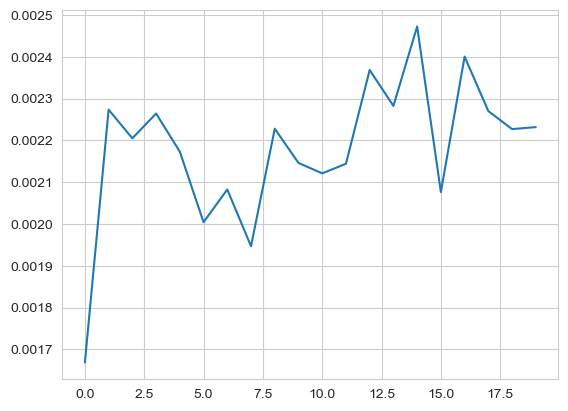

In [98]:
import matplotlib.pyplot as plt 
%matplotlib nbagg
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")


sns.lineplot(np.arange(20), total_time.mean(axis=0))

In [ ]:
for i in tqdm(range(1,test_page+1)):
    # Actualize the data 
    url_tmp = re.sub(r'\d', str(i), download_url)
    # request the csv file
    urlData = requests.get(url_tmp)
    # Check if request it's Ok
    if urlData:
        # check if it's the first time and create the original dataframe
        if i == 1:
            # Transform the data into a dataframe and create main dataframe
            df = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
        else: 
            # Transform the data dataframe and create a temporary df
            df_tmp = pd.read_csv(io.StringIO(urlData.content.decode('ISO-8859-1')), delimiter=';')
            #  concatenate the dataframe
            df = pd.concat(
                            [df, df_tmp],
                            axis=0,
                            join="outer",
                            ignore_index=True,
                            keys=None,
                            levels=None,
                            names=None,
                            verify_integrity=False,
                            copy=True,
                        )
    else:
        print('Problem')